In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import os

import sys 
sys.path.append("..") 
import add_mypathlevy

In [2]:
def load_results(dx, dt, N, u_supp, t_range, kernel_type, initial_type, bandwidth, scale_value, method_our):
    datafolder = os.path.join(add_mypathlevy.kdedata_folder, f"KDEpure{method_our}_dx{np.around(dx, decimals=2)}_dt{dt}_N{N}_supp_u{u_supp[-1]}_t_range{t_range[-1]}_kernel_type{kernel_type}_initial_type{initial_type}_bandwidth{bandwidth}")
    Data_set = np.load(os.path.join(datafolder, f"bikernel_data_scale{scale_value}.npz"),allow_pickle=True)
    Loss_set = np.load(os.path.join(datafolder, f"bikernel_loss_scale{scale_value}.npz"),allow_pickle=True)
    G_set = np.load(os.path.join(datafolder, f"bikernel_Gbar_scale{scale_value}.npz"),allow_pickle=True)
    Lnorm_set = np.load(os.path.join(datafolder, f"bikernel_L2l2{scale_value}.npz"),allow_pickle=True)
    return Data_set, Loss_set, G_set,Lnorm_set

In [3]:
dx = 0.01# space mesh size for generating data
N = 30 # number of data pairs (u_i, f_i);
u_Type = 'Laplacepdf'  # types: 'Compoundpdf'；'Laplacepdf' 
x_range = [-5, 5] # space range
dt = 0.05 # time mesh size  
t_range = [0, 5]  # time range
example_type = 'nonlocal'   
kernel_type = 'Laplacejump'#'Compoundlevy' ;'Laplacejump'
scale_value = 1
method_our = 'BiSNGD'
u_supp = [0,2]
initial_type = "zero"
bandwidth0 = 0.21#21
bandwidth1 = 0.105#21
bandwidth2 = 0.021#21

In [4]:
dataset0, lossset0, Gset0, Lnorm_set0 = load_results(dx, dt, N, u_supp, t_range, kernel_type, initial_type, bandwidth0, scale_value, method_our)
r_seq0 = dataset0["r_seq"]
x_reg60 = dataset0["x_reg6"]
x_reg40 = dataset0["x_reg4"]
x_reg70 = dataset0["x_reg7"]
x_reg80 = dataset0["x_reg8"]
x_reg90 = dataset0["x_reg9"]
K_true_val0 = dataset0["K_true_val"]

In [5]:
rho_val0 = Gset0["rho_val"]

In [6]:
rho_val0 

array([0.00748568, 0.01497106, 0.02244888, 0.0299258 , 0.03738764,
       0.04484799, 0.05228584, 0.05972159, 0.06712757, 0.07453086,
       0.08189728, 0.08926042, 0.09657984, 0.10389537, 0.11116061,
       0.11842136, 0.12562554, 0.13282464, 0.13996124, 0.14709217,
       0.15415505, 0.16121166, 0.16819506, 0.17517161, 0.18207022,
       0.18896139, 0.19577033, 0.20257125, 0.20928612, 0.21599237,
       0.22260921, 0.22921685, 0.23573219, 0.24223776, 0.24864861,
       0.25504911, 0.26135294, 0.26764586, 0.27384061, 0.2800239 ,
       0.286108  , 0.29218004, 0.29815234, 0.30411197, 0.30997175,
       0.31581826, 0.32156519, 0.32729826, 0.3329324 , 0.3385521 ,
       0.34407389, 0.34958065, 0.35499085, 0.36038545, 0.36568511,
       0.37096863, 0.37615912, 0.38133292, 0.38641583, 0.39148153,
       0.39645869, 0.40141813, 0.40629156, 0.41114678, 0.41591866,
       0.42067187, 0.42534452, 0.42999807, 0.43457392, 0.43913026,
       0.44361184, 0.44807352, 0.45246341, 0.45683303, 0.46113

In [7]:
dataset1, lossset1, Gset1, Lnorm_set1 = load_results(dx, dt, N, u_supp, t_range, kernel_type, initial_type, bandwidth1, scale_value, method_our)
r_seq1 = dataset1["r_seq"]
x_reg61 = dataset1["x_reg6"]
x_reg41 = dataset1["x_reg4"]
x_reg71 = dataset1["x_reg7"]
x_reg81 = dataset1["x_reg8"]
x_reg91 = dataset1["x_reg9"]
K_true_val1 = dataset1["K_true_val"]

In [8]:
rho_val1 = Gset1["rho_val"]

In [9]:
dataset2, lossset2, Gset2, Lnorm_set2 = load_results(dx, dt, N, u_supp, t_range, kernel_type, initial_type, bandwidth2, scale_value, method_our)
r_seq2 = dataset2["r_seq"]
x_reg62 = dataset2["x_reg6"]
x_reg42 = dataset2["x_reg4"]
x_reg72 = dataset2["x_reg7"]
x_reg82 = dataset2["x_reg8"]
x_reg92 = dataset2["x_reg9"]
K_true_val2 = dataset2["K_true_val"]

In [10]:
rho_val2 = Gset2["rho_val"]

In [12]:
from matplotlib.colors import to_rgba
from matplotlib.patches import Patch
from matplotlib.legend_handler import HandlerTuple

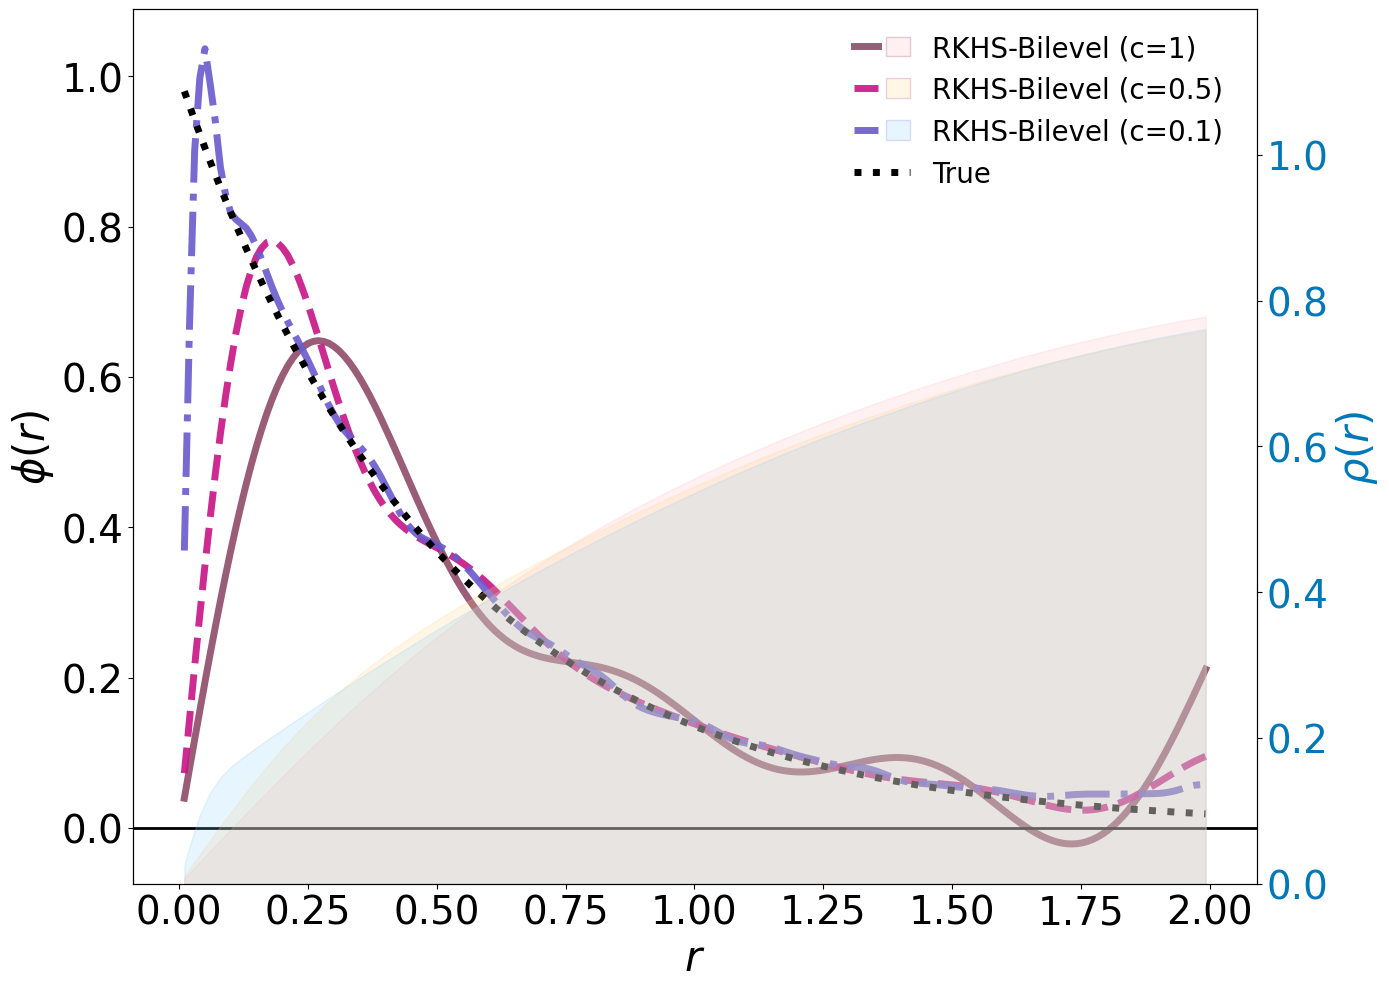

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.patches import Patch
from matplotlib.legend_handler import HandlerTuple

# Increase figure size for better visibility
fig, ax1 = plt.subplots(figsize=(14, 10))

# Define distinct colors for curves
estimator_colors = ['#70193D', '#C71585', '#6A5ACD', '#000000']  # Last one is black for "True"

# Custom linestyles for visual distinction
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), ':']

# Increase linewidth for emphasis
linewidth_value = 5

# === Plot RKHS-Bilevel estimators ===
line_c1, = ax1.plot(r_seq0, x_reg70, color=estimator_colors[0], linestyle=linestyles[0],
                    linewidth=linewidth_value, alpha=0.7,
                    label=f"RKHS-Bilevel (h={bandwidth0}, c=1)", zorder=2)

line_c05, = ax1.plot(r_seq1, x_reg71, color=estimator_colors[1], linestyle=linestyles[1],
                     linewidth=linewidth_value, alpha=0.9,
                     label=f"RKHS-Bilevel (h={bandwidth1}, c=0.5)", zorder=2)

line_c01, = ax1.plot(r_seq2, x_reg72, color=estimator_colors[2], linestyle=linestyles[2],
                     linewidth=linewidth_value, alpha=0.9,
                     label=f"RKHS-Bilevel (h={bandwidth2}, c=0.1)", zorder=2)

# True curve (最高优先级，zorder=3)
line_true, = ax1.plot(r_seq1, K_true_val1, color=estimator_colors[3], linestyle=linestyles[5],
                      linewidth=linewidth_value, alpha=1.0, label="True", zorder=3)

ax1.axhline(y=0, color='black', linewidth=2)

# === Secondary y-axis for rho(r) ===
ax2 = ax1.twinx()

# Use contrasting pastel shades for rho(r)
fill_c1 = ax2.fill_between(r_seq0, 0, rho_val0, color=to_rgba("#FFB6C1", alpha=0.2), zorder=1)
fill_c05 = ax2.fill_between(r_seq1, 0, rho_val1, color=to_rgba("#FFD580", alpha=0.2), zorder=1)
fill_c01 = ax2.fill_between(r_seq2, 0, rho_val2, color=to_rgba("#87CEFA", alpha=0.2), zorder=1)
# Formatting for axes
ax1.set_xlabel(r'$r$', fontsize=30, fontweight='bold')
ax1.set_ylabel(r'$\phi(r)$', fontsize=30, fontweight='bold')
ax2.set_ylabel(r'$\rho(r)$', fontsize=30, fontweight='bold', color='#0077b6')

# Secondary y-axis range
ax2.set_ylim(0, 1.2)
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.tick_params(axis='y', labelsize=28, labelcolor='#0077b6')

# Increase tick size
ax1.tick_params(axis='x', labelsize=28)
ax1.tick_params(axis='y', labelsize=28)

# === Legend: group line + fill into one entry ===
patch_c1  = Patch(facecolor="#FFB6C1", edgecolor=estimator_colors[0], alpha=0.2)
patch_c05 = Patch(facecolor="#FFD580", edgecolor=estimator_colors[1], alpha=0.2)
patch_c01 = Patch(facecolor="#87CEFA", edgecolor=estimator_colors[2], alpha=0.2)

group_handles = [
    (line_c1,  patch_c1),   # c = 1
    (line_c05, patch_c05),  # c = 0.5
    (line_c01, patch_c01),  # c = 0.1
    (line_true,)            # True (only line)
]
group_labels = [
    r"RKHS-Bilevel (c=1)  ",
    r"RKHS-Bilevel (c=0.5) ",
    r"RKHS-Bilevel (c=0.1) ",
    "True"
]

ax1.legend(
    handles=group_handles,
    labels=group_labels,
    handler_map={tuple: HandlerTuple(ndivide=None, pad=0.3)},
    frameon=False,
    loc="upper right",
    fontsize=20,
    ncol=1,  # 单列分组
    columnspacing=0.6,
    handlelength=2.0,
    handletextpad=0.8,
)

# Ensure tight layout
plt.tight_layout()
figure_path = os.path.join(add_mypathlevy.figure_folder, f"KDEPurejump{kernel_type}compareestimators_bandwidthN{N}.pdf")
#plt.savefig(figure_path, bbox_inches='tight', dpi=500)
# Show figure
plt.show()


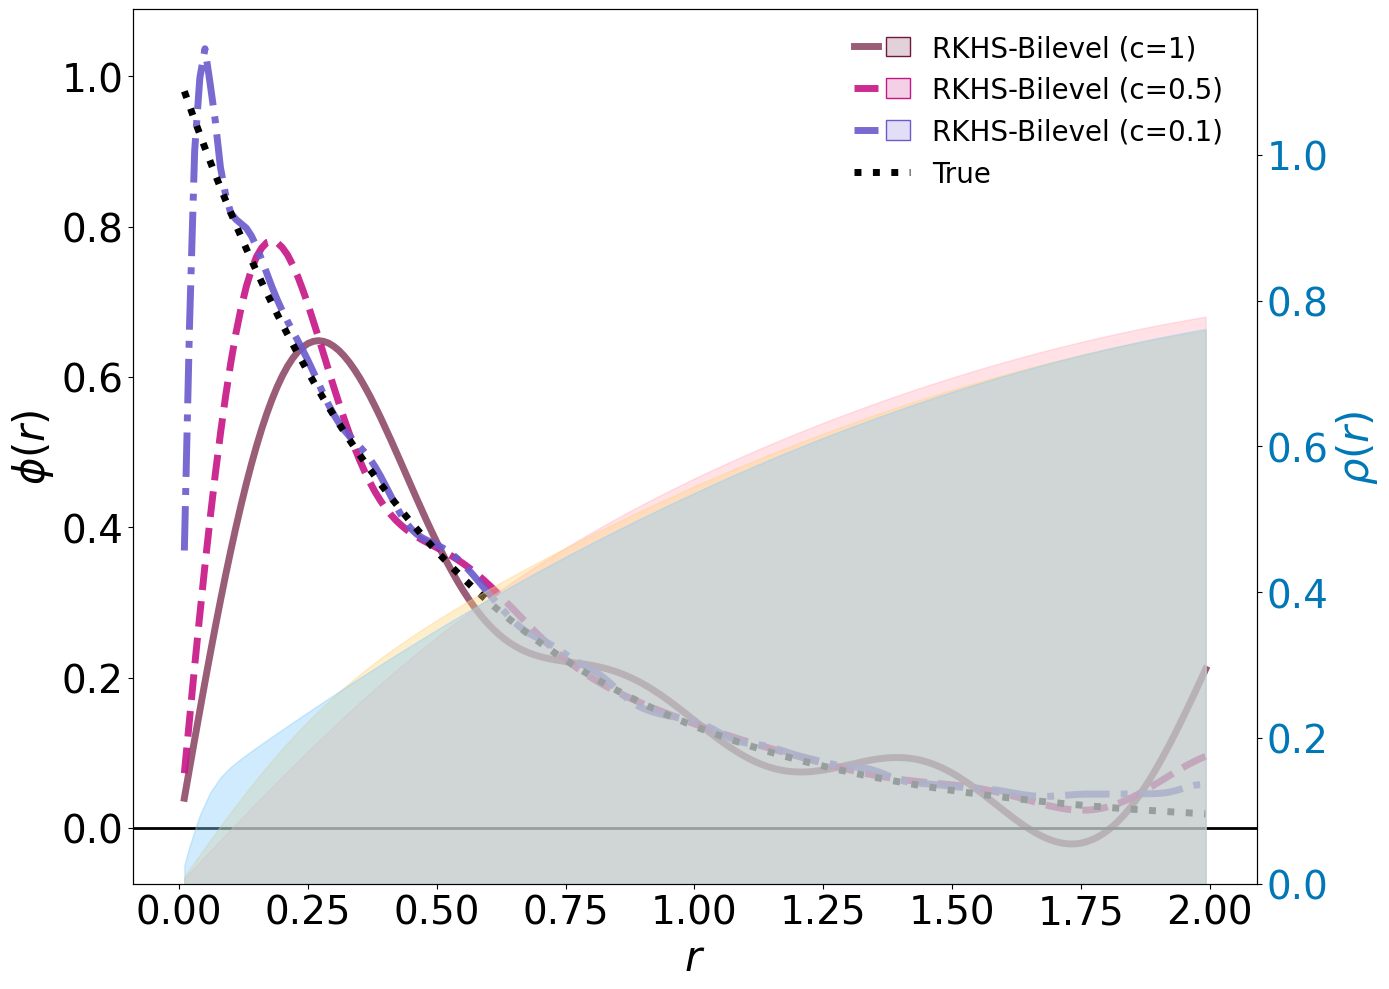

In [12]:
# Increase figure size for better visibility
fig, ax1 = plt.subplots(figsize=(14, 10))

# Define distinct pastel colors from Set2
colors = plt.get_cmap('Set2').colors
estimator_colors = ['#70193D', '#C71585', '#6A5ACD', '#000000'] # Last one is black for "True"

# Custom linestyles for visual distinction
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), ':']

# Increase linewidth for emphasis
linewidth_value = 5

# Plot RKHS-Bilevel estimators with different bandwidths
ax1.plot(r_seq0, x_reg70, color=estimator_colors[0], linestyle=linestyles[0],
         linewidth=linewidth_value, alpha=0.7,
         label=f"RKHS-Bilevel (h={bandwidth0}, c= 1)")

ax1.plot(r_seq1, x_reg71, color=estimator_colors[1], linestyle=linestyles[1],
         linewidth=linewidth_value, alpha=0.9,
         label=f"RKHS-Bilevel (h={bandwidth1}, c = 0.5)")

ax1.plot(r_seq2, x_reg72, color=estimator_colors[2], linestyle=linestyles[2],
         linewidth=linewidth_value, alpha=0.9,
         label=f"RKHS-Bilevel (h={bandwidth2}, c = 0.1)")

# Plot the true curve
ax1.plot(r_seq1, K_true_val1, color=estimator_colors[3], linestyle=linestyles[5],
         linewidth=linewidth_value, alpha=1.0, label="True")

ax1.axhline(y=0, color='black', linewidth=2)

# Secondary y-axis for rho(r)
ax2 = ax1.twinx()
ax2.fill_between(r_seq0, 0, rho_val0, color=to_rgba("#FFB6C1", alpha=0.4))  # 浅粉
ax2.fill_between(r_seq1, 0, rho_val1, color=to_rgba("#FFD580", alpha=0.4))  # 浅橙
ax2.fill_between(r_seq2, 0, rho_val2, color=to_rgba("#87CEFA", alpha=0.4))  # 浅蓝
# Formatting for axes
ax1.set_xlabel(r'$r$', fontsize=30, fontweight='bold')
ax1.set_ylabel(r'$\phi(r)$', fontsize=30, fontweight='bold')
ax2.set_ylabel(r'$\rho(r)$', fontsize=30, fontweight='bold', color='#0077b6')

# **Set secondary y-axis range to [0,1.2] but show ticks only from [0,1]**
ax2.set_ylim(0, 1.2)
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])  # Show ticks only up to 1

# Increase tick size to match the larger figure
ax1.tick_params(axis='x', labelsize=28)
ax1.tick_params(axis='y', labelsize=28)
ax2.tick_params(axis='y', labelsize=28, labelcolor='#0077b6')

# Improve grid visibility
#ax1.grid(True, linestyle='--', alpha=0.6)

# Adjust legend position **without a box**
# lines1, labels1 = ax1.get_legend_handles_labels()
# ax1.legend(lines1, labels1, frameon=False, loc="upper right", fontsize=20)
patch_c1  = Patch(facecolor=to_rgba(estimator_colors[0], alpha=0.20), edgecolor=estimator_colors[0])
patch_c05 = Patch(facecolor=to_rgba(estimator_colors[1], alpha=0.20), edgecolor=estimator_colors[1])
patch_c01 = Patch(facecolor=to_rgba(estimator_colors[2], alpha=0.20), edgecolor=estimator_colors[2])

# —— 拿到三条曲线的真实句柄（建议在你 plot 时顺手保存返回值）——
# 若你已有 handle，可直接复用；否则用空数据创建“仅用于图例”的线句柄
line_c1,  = ax1.plot([], [], color=estimator_colors[0], linestyle=linestyles[0], linewidth=linewidth_value, alpha=0.7)
line_c05, = ax1.plot([], [], color=estimator_colors[1], linestyle=linestyles[1], linewidth=linewidth_value, alpha=0.9)
line_c01, = ax1.plot([], [], color=estimator_colors[2], linestyle=linestyles[2], linewidth=linewidth_value, alpha=0.9)
line_true, = ax1.plot([], [], color='black', linestyle=linestyles[5], linewidth=linewidth_value, alpha=1.0)

# —— 组合“线+色块”为一个 legend 条目（单列分组）——
group_handles = [
    (line_c1,  patch_c1),   # c = 1
    (line_c05, patch_c05),  # c = 0.5
    (line_c01, patch_c01),  # c = 0.1
    (line_true,)            # True（只有线，没有填充）
]
group_labels = [
    r"RKHS-Bilevel (c=1) ", 
    r"RKHS-Bilevel (c=0.5) ",
    r"RKHS-Bilevel (c=0.1)",
    "True"
]

# —— 设置图例为单列分组，并让 tuple 句柄由 HandlerTuple 渲染 —— 
ax1.legend(
    handles=group_handles,
    labels=group_labels,
    handler_map={tuple: HandlerTuple(ndivide=None, pad=0.3)},
    frameon=False,
    loc="upper right",
    fontsize=20,
    ncol=1,                # 单列
    columnspacing=0.6,
    handlelength=2.0,
    handletextpad=0.8,
)
# Ensure tight layout
plt.tight_layout()  # Leaves extra space for the legend
plt.show()
#figure_path = os.path.join(add_mypathlevy.figure_folder, f"KDEPurejump{kernel_type}estimators_bandwidthN{N}.pdf")
#plt.savefig(figure_path, bbox_inches='tight', dpi=500)
# Show figure
plt.show()

In [13]:
# Load p(x,t) data
def load_densitydata(dt, T, bandwidth, noise_type,initial_type, method):

    folder = os.path.join(add_mypathlevy.kdedata_folder, f"Pure{method}_results_noise_{noise_type}_initial_type{initial_type}_dt_{dt}_T_{T}_bandwidth{bandwidth}")
    
    # Load pdf data with filter
    Density_set = np.load(os.path.join(folder, f"KDEdensity_{method}.npy"))
    
    # Load variables
    KDEparam_set = np.load(os.path.join(folder, f"KDEparameters_{method}.npz"))
    
    return Density_set, KDEparam_set

In [14]:
T = 5
noise_type = "laplacejump"
method='Explicit'
Density_set0, KDEparam_set0 = load_densitydata(dt, T, bandwidth0, noise_type,initial_type, method)
Density_set1, KDEparam_set1 = load_densitydata(dt, T, bandwidth1, noise_type,initial_type, method)
Density_set2, KDEparam_set2 = load_densitydata(dt, T, bandwidth2, noise_type,initial_type, method)

In [15]:
def load_data(dt, T, noise_type, initial_type, method):

    folder = os.path.join(add_mypathlevy.kdedata_folder, f"PureSDE{method}_results_noise_{noise_type}_initial_type{initial_type}_dt_{dt}_T_{T}")
    
    # Load original trajectories
    Data_set = np.load(os.path.join(folder, f"Data_{method}.npy"))
    
    # Load modified trajectories
    trajectories_set = np.load(os.path.join(folder, f"trajectories_{method}.npy"))
    
    # Load meta data
    with open(os.path.join(folder, "metadata.json"), "r") as f:
        metadata = json.load(f)
    
    return Data_set, trajectories_set, metadata

In [16]:
import json
_,trajectories_set,_=load_data(dt, T, noise_type, initial_type, method)

In [17]:
x_grid = KDEparam_set0['x_grid']

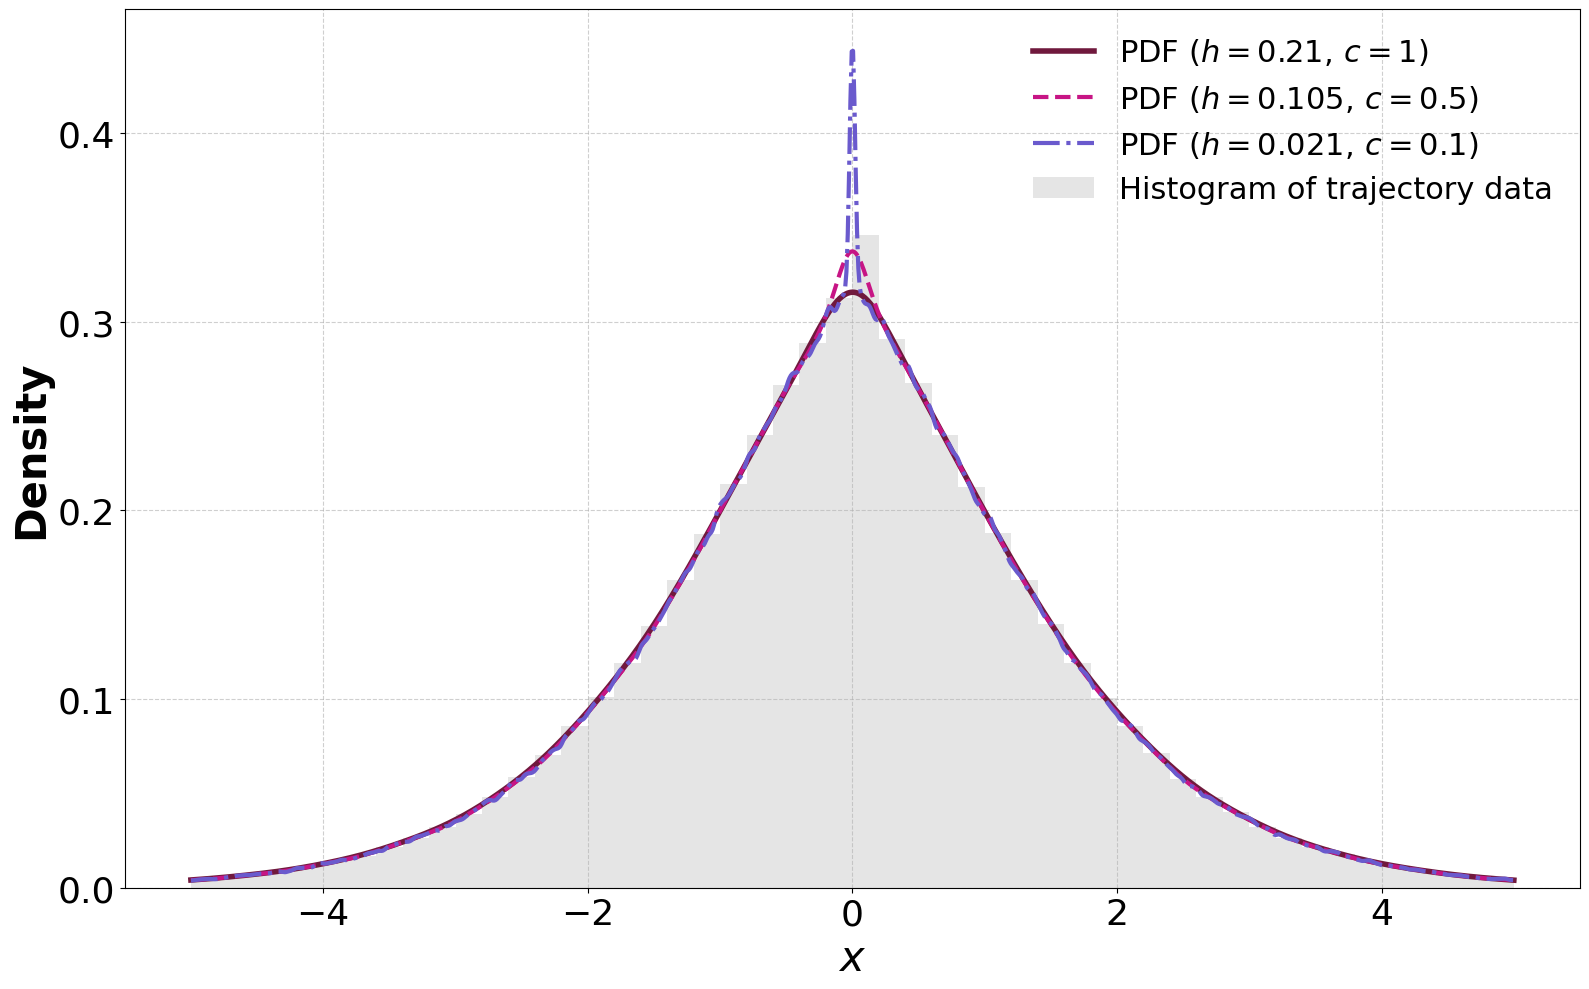

In [18]:
# Create figure with larger size and high resolution
fig, ax = plt.subplots(figsize=(16, 10))
estimator_colors = ['#70193D', '#C71585', '#6A5ACD', '#000000'] # Last one is black for "True"

# Custom linestyles for visual distinction
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), ':']

# Plot KDE curves with updated linewidth, linestyle, and colors
ax.plot(x_grid, Density_set0[-1, :], color=estimator_colors[0], linestyle=linestyles[0], linewidth=4,
        label=fr'PDF ($h={bandwidth0},\, c=1$)')

ax.plot(x_grid, Density_set1[-1, :], color=estimator_colors[1], linestyle=linestyles[1], linewidth=3,
        label=fr'PDF ($h={bandwidth1},\, c=0.5$)')

ax.plot(x_grid, Density_set2[-1, :], color=estimator_colors[2], linestyle=linestyles[2], linewidth=3,
        label=fr'PDF ($h={bandwidth2},\, c=0.1$)')

# Add histogram with transparency and grey color
ax.hist(trajectories_set[:, -1], bins=50, range=(-5, 5), density=True,
        alpha=0.2, color='gray', label='Histogram of trajectory data')

# Axis labels and title
ax.set_xlabel(r'$x$', fontsize=30, fontweight='bold')
ax.set_ylabel('Density', fontsize=30, fontweight='bold')

# Ticks and grid
ax.tick_params(axis='both', labelsize=26)
ax.grid(True, linestyle='--', alpha=0.6)

# Legend styling
ax.legend(loc='upper right', frameon=False, fontsize=22)

# Tight layout
plt.tight_layout()
figure_path = os.path.join(add_mypathlevy.figure_folder, f"KDEPurejump{kernel_type}pdf_N{N}.pdf")
#plt.savefig(figure_path, bbox_inches='tight', dpi=500)
# Show the figure
plt.show()